In [56]:
import os 
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
import numpy as np
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning


In [57]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 2721 files belonging to 3 classes.


In [58]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

test_data = test_data.map(lambda x, y: (x / 255.0, y))

Found 99 files belonging to 3 classes.


In [59]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 243 files belonging to 3 classes.


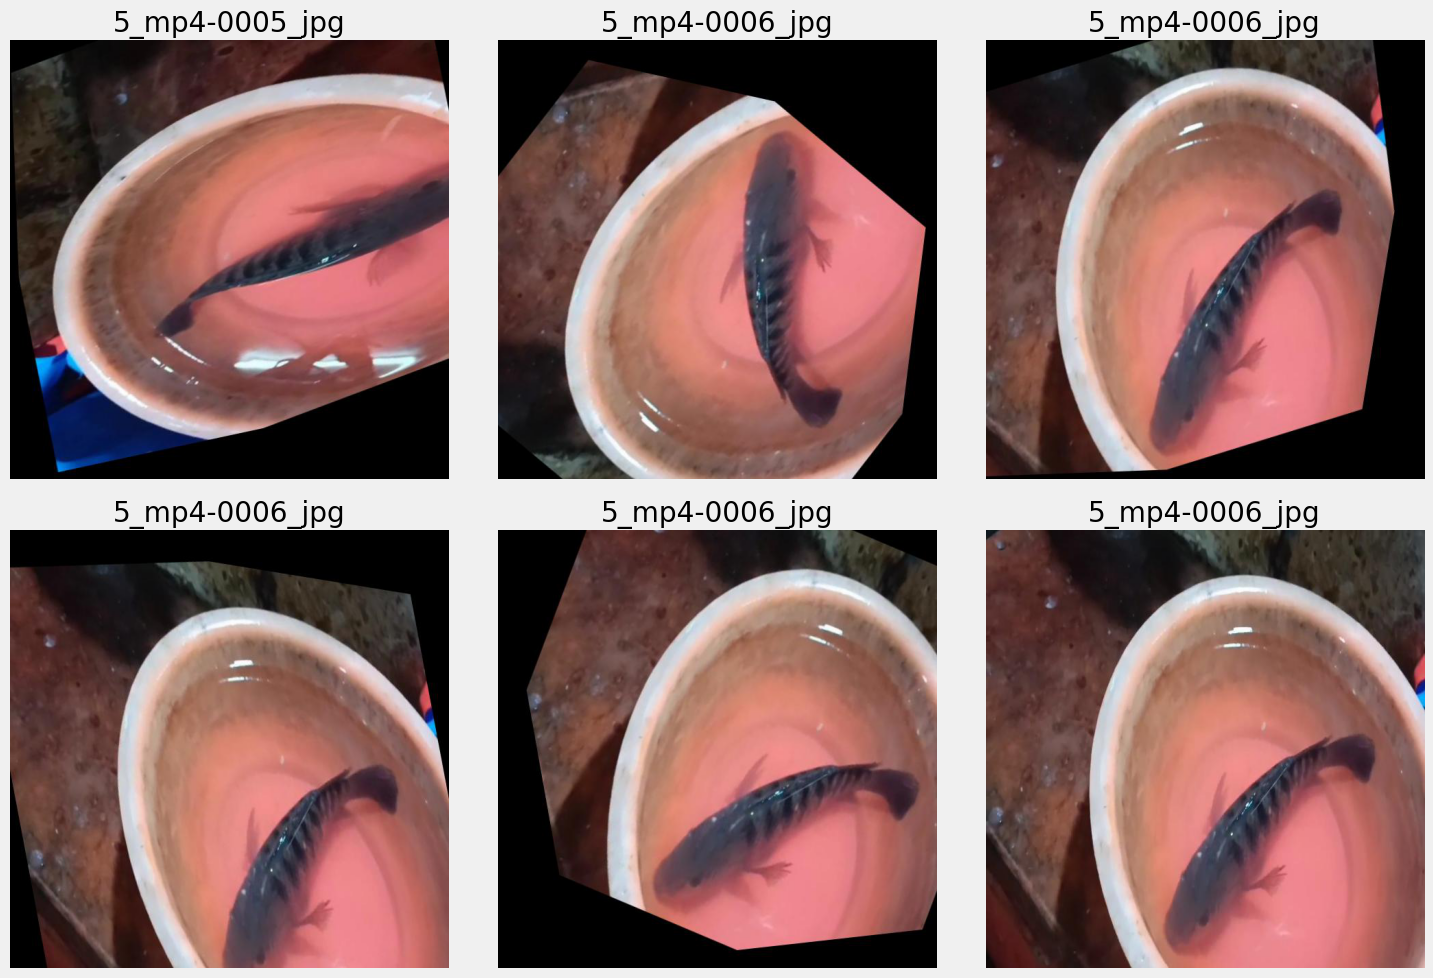

In [60]:
# Path to the directory containing images
path = "dataset/train/mujahir"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

In [61]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

In [62]:
conv_base.trainable = False

In [63]:
conv_base.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_2              │ (None, 262, 262, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,408 │ zero_padding2d_2[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_3              │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 64, 64, 64)        │               0 │ zero_padding2d_3[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 64, 64, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 64, 64, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [64]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Ubah jumlah kelas menjadi 3

In [65]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[EarlyStopping(patience=3)])

Epoch 1/10
 7/86 ━━━━━━━━━━━━━━━━━━━━ 3:48 3s/step - accuracy: 0.3563 - loss: 1.5351

KeyboardInterrupt: 

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.98:
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  
    monitor='val_accuracy',    
    save_best_only=True,       
    mode='max',                
    verbose=1
)

model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=5,
    batch_size=32,
    verbose=1,
    validation_data=val_data,
    callbacks=[callbacks, checkpoint]
)


In [ ]:
def model_evaluation(model):
    train_score = model.evaluate(train_data, verbose= 1)
    valid_score = model.evaluate(val_data, verbose= 1)
    test_score = model.evaluate(test_data, verbose= 1)
    
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])

In [ ]:
def get_pred(model, test_data):
    
    preds = model.predict(test_data)
    y_pred = np.argmax(preds, axis = 1)
    
    return y_pred

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_data = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict classes
y_pred_probs = model.predict(test_data, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_data.classes

# Plot confusion matrix
class_names = list(test_data.class_indices.keys())

def plot_confusion_matrix(y_true, y_pred, class_names):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_true, y_pred, class_names)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')  # Use 'micro' or 'weighted' if needed
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
cm = confusion_matrix(y_true, y_pred)

# Specificity calculation
tn = cm.diagonal()
fp = cm.sum(axis=0) - tn
specificity = tn / (tn + fp)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"precision: {precision:.4f}")


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Path ke gambar lokal
image_path = 'D:/MATA KULIAH/Semester 5/PM/Project/project-PM-kel-05/new_data/jair.jpg'

# Load dan preprocess gambar (ubah ukuran gambar menjadi 256x256 sesuai dengan input model)
img = load_img(image_path, target_size=(256, 256))  # Sesuaikan ukuran menjadi 256x256
img_array = img_to_array(img) / 255.0  # Normalisasi (0-1)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

# Prediksi gambar
predictions = model.predict(img_array)

# Konversi probabilitas ke persentase
predicted_percentages = predictions[0] * 100  # Konversi ke persen

# Definisikan kelas secara manual (sesuaikan dengan kelas yang Anda miliki)
class_labels = ['mujahir', 'red_devil', 'sepat']  # Gantilah dengan nama kelas yang sesuai

# Menampilkan hasil
for i, label in enumerate(class_labels):
    print(f"{label}: {predicted_percentages[i]:.2f}%")

# Menampilkan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions, axis=1)
print(f"\nHasil Prediksi: {class_labels[predicted_class[0]]} ({predicted_percentages[predicted_class[0]]:.2f}%)")
